In [ ]:
from dotenv import load_dotenv
load_dotenv()
import os
api_key=os.getenv("GROQ_API_KEY")

model="deepseek-r1-distill-llama-70b"
#api_key="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"



In [41]:
from langchain_groq import ChatGroq
llm=ChatGroq( model_name=model,api_key=api_key )
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.084641336, 'prompt_time': 5.5199e-05, 'queue_time': 0.057998851000000004, 'total_time': 0.084696535}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'stop', 'logprobs': None}, id='run--38b595f2-cec6-4b9c-b5fc-1b80041a9b17-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [42]:

import operator
from typing import List
from langgraph.graph.message import add_messages
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [43]:

def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [44]:
state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.186230398, 'prompt_time': 0.000253377, 'queue_time': 0.058745153, 'total_time': 0.186483775}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e358722-7f7d-4097-92ae-ac9e2e8ae5f5-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [45]:

from langchain_core.messages import AnyMessage
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

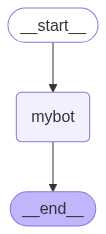

In [46]:
workflow=StateGraph(MessagesState)
workflow.add_node("mybot",call_model)
workflow.add_edge(START,"mybot")
workflow.add_edge("mybot",END)
app=workflow.compile()
app





In [47]:
input={"messages":["hi hello how are you?"]}
app.invoke(input)



{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='aa387060-b27a-45d9-812f-9d29c7ee014d'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.185641073, 'prompt_time': 0.000205368, 'queue_time': 0.055494787000000004, 'total_time': 0.185846441}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'stop', 'logprobs': None}, id='run--c4e0902b-55dd-458c-ab03-2ff2da6630a4-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [48]:

for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.202897915, 'prompt_time': 0.000217878, 'queue_time': 0.055370547, 'total_time': 0.203115793}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'stop', 'logprobs': None}, id='run--06beefd8-165e-4290-b320-96d623bb27fd-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}




In [49]:

@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

with tool calling

search.invoke("what is a tempurature in kashmir?")


In [50]:
search.invoke("what is a tempurature in kashmir?")


'the temp is 25 degree and cloudy'

In [51]:
search.invoke("what is a tempurature in delhi?")


'the temp is 45 degree and sunny'

In [52]:
llm.invoke("what is a weather in delhi?")


AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi experiences a humid subtropical climate with distinct seasons:\n\n- **Summer (April to June):** Extremely hot with temperatures often reaching 45°C (113°F).\n- **Monsoon (July to September):** Hot and humid with heavy rainfall.\n- **Winter (December to February):** Cool with temperatures dropping to around 5°C (41°F).\n- **Spring (March to April):** Mild and pleasant.\n\nFor the current weather in Delhi, please check a reliable weather service like AccuWeather, Weather.com, or the India Meteorological Department (IMD).', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 11, 'total_tokens': 153, 'completion_time': 0.516363636, 'prompt_time': 0.000284117, 'queue_time': 0.055754513, 'total_time': 0.516647753}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish

binding tool to llm

In [53]:
tools=[search]
llm_with_tool=llm.bind_tools(tools)




In [54]:
response=llm_with_tool.invoke("what is a weather is delhi?")


In [55]:
response.content


''

In [56]:
response.tool_calls


[{'name': 'search',
  'args': {'query': 'Delhi'},
  'id': '5rb19d4kk',
  'type': 'tool_call'}]

In [57]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [58]:
input={"messages":["what is a weather in delhi?"]}
response=call_model(input)



In [59]:
response["messages"][-1].content


''

In [60]:
response["messages"][-1].tool_calls


[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'x9apb6zjy',
  'type': 'tool_call'}]

In [61]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [62]:
tool_node=ToolNode(tools)


In [63]:
workflow2=StateGraph(MessagesState)

workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})


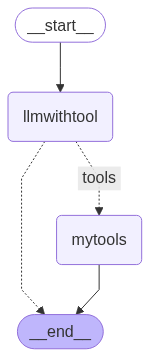

In [64]:
app2=workflow2.compile()
app2

In [65]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})
response["messages"][-1].content



'the temp is 25 degree and cloudy'

In [66]:
app2.invoke({"messages":["what is a weather in delhi?"]})


{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='c25657f3-9c71-4989-b8ee-591c5ce9808e'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in Delhi. I need to figure out the best way to help them. I remember I have a tool called "search" that can assist with weather information. \n\nFirst, I should call the "search" function with the query "weather in Delhi." That should provide the current weather details. \n\nWait, maybe I should check if the function requires any specific parameters. Oh, right, it just needs a query string. So, I\'ll structure the JSON with the name as "search" and the arguments as an object containing "query" set to "weather in Delhi."\n\nLet me make sure the syntax is correct. The function name is "search" and the arguments should be a JSON object with "query" as the key. So, the tool call should look like this:\n\n{"name": "search", "argument

In [67]:
app2.invoke({"messages":["hi how are you?"]})


{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='035d12c2-db3d-4d60-bb5a-518262ae6137'),
  AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today?", additional_kwargs={'reasoning_content': 'Okay, the user greeted me with "hi how are you?" which is a friendly opener. I need to respond appropriately. Since I\'m an AI, I don\'t have feelings, but I should acknowledge their greeting. I\'ll mention that I\'m just a program and offer assistance. Maybe ask how I can help them today to keep the conversation going.\n'}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 130, 'total_tokens': 242, 'completion_time': 0.499578654, 'prompt_time': 0.008510097, 'queue_time': 0.058835992999999996, 'total_time': 0.508088751}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reaso

In [68]:
workflow2.add_edge("mytools","llmwithtool")


Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


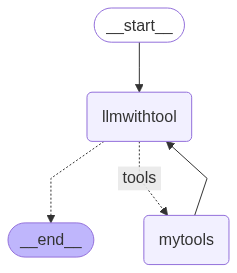

In [69]:
app3=workflow2.compile()
app3

In [70]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in New Delhi. I need to figure out the best way to help them. They mentioned using a tool called "search" which is designed for weather queries. So, I should use that tool.\n\nFirst, I\'ll structure the function call. The function name is "search" and the argument is a query string. The query should clearly state "weather in New Delhi" so the tool can fetch the correct information.\n\nI should make sure the JSON is properly formatted. The arguments object should have a "query" key with the string value. Then, wrap it all in the tool_call XML tags as specified.\n\nLet me double-check the syntax to avoid any mistakes. The function name is correct, and the query is clear. That should do it.\n', 'tool_calls': [{'id': 'mtzdyt4d1', 'function': {'arguments': '{"query":"weather in New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, 

In [71]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()


In [72]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

workflow3.add_edge("mytools","llmwithtool")

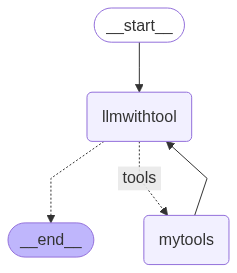

In [74]:
app4=workflow3.compile(checkpointer=memory)
app4

In [75]:

config={"configurable": {"thread_id": "1"}}

In [76]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [77]:

for event in events:
    event["messages"][-1].pretty_print()
    

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (jacmvqtj9)
 Call ID: jacmvqtj9
  Args:
    query: weather in New Delhi
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

The weather in New Delhi is currently 45 degrees and sunny. It's a great day to be outdoors!


In [78]:

events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )


for event in events:
    event["messages"][-1].pretty_print()

    

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (6edgyg2px)
 Call ID: 6edgyg2px
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

The weather in Indore is currently 25 degrees and cloudy. It's a nice day to enjoy outdoor activities!


In [79]:
memory.get(config)


{'v': 3,
 'ts': '2025-07-17T19:27:49.156270+00:00',
 'id': '1f063441-fd68-62c7-8008-e12933d8bf23',
 'channel_versions': {'__start__': '00000000000000000000000000000007.0.9750711456828471',
  'messages': '00000000000000000000000000000010.0.07567919572378468',
  'branch:to:llmwithtool': '00000000000000000000000000000010.0.5744112157876589',
  'branch:to:mytools': '00000000000000000000000000000009.0.7892715918093149'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000006.0.3911611227273837'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000009.0.9988105548811956'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000008.0.9796703382753579'}},
 'pending_sends': [],
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='e3315255-d177-4135-8ccf-8325600315fb'),
   AIMessage(content='', additional_kwargs={'reasoning_content': 'Oka

In [80]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

In [81]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [82]:
search.invoke("what is the latest update on iphone17 release?")


DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

In [83]:
tools=[multiply, add, divide, search]


In [84]:
llm_with_tools=llm.bind_tools(tools)
response=llm_with_tools.invoke("hi")
response.content


'Hello! How can I assist you today?'

In [85]:
response.tool_calls


[]

In [86]:
response=llm_with_tools.invoke("what is 2+2?")
response.content



''

In [87]:
response.tool_calls



[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'kwbazw0c1',
  'type': 'tool_call'}]

In [88]:
response=llm_with_tools.invoke("what is 10/2?")
response.content


''

In [89]:
response.tool_calls


[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 'y5np6w8e1',
  'type': 'tool_call'}]

In [91]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")
response.content


'The TATA Group was founded in 1868 by Jamsetji Tata, making it 155 years old as of 2023.'

In [ ]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."
user_query=["tell me what is 2+2"]
[SYSTEM_PROMPT]+user_query


In [93]:

def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    

In [96]:

from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition



In [97]:
builder=StateGraph(MessagesState)
builder.add_node("llm_decision_step",function_1)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"llm_decision_step")

builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
builder.add_edge("tools","llm_decision_step")



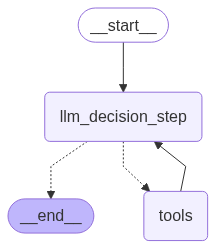

In [99]:
react_graph=builder.compile()
react_graph


In [100]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]


In [101]:
react_graph.invoke({"messages":message})



{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='e65be619-d1be-49c9-9ca8-1c16bcfc6e99'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "What is 2 times of narendramodi\'s age?" Hmm, I need to figure out how to respond to this. First, I should break down the question. They want the age of Narendra Modi multiplied by 2. \n\nI know that Narendra Modi is a public figure, so his age is publicly available information. But I\'m not sure exactly how old he is off the top of my head. Maybe I should look it up to get the correct number. \n\nI remember that I have access to a tool called duckduckgo_search which can help me find current information. So, I can use that to search for Narendra Modi\'s age. That makes sense because it ensures I get the most accurate and up-to-date information.\n\nOnce I have his age, the next step is to multiply it by 2. I have a tool called mult

In [102]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]
react_graph.invoke({"messages":message})


{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='272a7e2e-7faa-4202-87fe-73e0d1fd69af'),
  AIMessage(content='', additional_kwargs={'reasoning_content': "Alright, so the user is asking for Elon Musk's net worth and then to divide it by 2. First, I need to find the current net worth. Since I don't have real-time data, I'll use the DuckDuckGo tool to search for the latest information. Once I have the net worth, I'll use the divide function to split it by 2 and provide the result.\n", 'tool_calls': [{'id': 'dx0t91gr2', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 212, 'prompt_tokens': 427, 'total_tokens': 639, 'completion_time': 0.770909091, 'prompt_time': 0.034875058, 'queue_time': 0.058369142, 'total_time': 0.805784149}, 'model_name': 'deepseek-r1-distill-llama-70